In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import nan
from datetime import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense


Reading Data Sets 

In [17]:
parse = lambda x: datetime.strptime(x,'%d/%m/%Y %H:%M')
data = pd.read_csv('EastLobe_absolute.csv',
                parse_dates = True, index_col=0, date_parser=parse,
                  low_memory = False)

In [18]:
parse = lambda x: datetime.strptime(x,'%d/%m/%Y %H:%M')
data1 = pd.read_csv('WestLobe_absolute.csv',
                  parse_dates = True, index_col=0, date_parser=parse,
                  low_memory = False)
data1.head()

,PIEZOMETER_VALUE
TIMESTAMP,
2015-01-01 00:00:00,1.6342
2015-01-01 00:30:00,1.6433
2015-01-01 01:00:00,1.6384
2015-01-01 01:30:00,1.6318
2015-01-01 02:00:00,1.6340


In [20]:
np.isnan(data).sum()

 PIEZOMETER_VALUE    28443
dtype: int64

In [21]:
data.shape

(87648, 1)

# Filling in the missing values using interpolation.

In [22]:

interpolated = data.interpolate(method='linear',limit_direction ='backward')
print(interpolated)

                      PIEZOMETER_VALUE
TIMESTAMP                             
2015-01-01 00:00:00             1.7168
2015-01-01 00:30:00             1.7226
2015-01-01 01:00:00             1.7166
2015-01-01 01:30:00             1.7189
2015-01-01 02:00:00             1.7158
...                                ...
2019-12-31 21:30:00             1.1489
2019-12-31 22:00:00             1.1532
2019-12-31 22:30:00             1.1528
2019-12-31 23:00:00             1.1545
2019-12-31 23:30:00             1.1555

[87648 rows x 1 columns]


In [23]:
interpolated1 = data1.interpolate(method='linear',limit_direction ='backward')
print(interpolated1)

                      PIEZOMETER_VALUE
TIMESTAMP                             
2015-01-01 00:00:00             1.6342
2015-01-01 00:30:00             1.6433
2015-01-01 01:00:00             1.6384
2015-01-01 01:30:00             1.6318
2015-01-01 02:00:00             1.6340
...                                ...
2019-12-31 21:30:00            -0.0308
2019-12-31 22:00:00            -0.0297
2019-12-31 22:30:00            -0.0313
2019-12-31 23:00:00            -0.0302
2019-12-31 23:30:00            -0.0302

[87648 rows x 1 columns]


In [24]:
print(np.isnan(interpolated).sum())
print("/n")
print(np.isnan(interpolated1).sum())

 PIEZOMETER_VALUE    0
dtype: int64
/n
 PIEZOMETER_VALUE    0
dtype: int64


### Resampling the time series data based on daily frequency 'D' indicates a day

In [25]:
upsampled = interpolated.resample('D').mean()
upsampled1 = interpolated1.resample('D').mean()

In [26]:
upsampled.head(2)

,PIEZOMETER_VALUE
TIMESTAMP,
2015-01-01,1.715942
2015-01-02,1.709665


In [39]:
upsampled1.head(2)

,PIEZOMETER_VALUE
TIMESTAMP,
2015-01-01,1.664029
2015-01-02,1.525135


In [27]:
upsampled.to_csv('cleanedPZEAST.csv')
upsampled1.to_csv('cleanedPZWEST.csv')

### Reading cleaned data set 

In [28]:
df = pd.read_csv('cleanedPZEAST.csv', parse_dates = True, index_col = 'TIMESTAMP', low_memory = False)
dw = pd.read_csv('cleanedPZWEST.csv', parse_dates = True, index_col = 'TIMESTAMP', low_memory = False)

# Exploratory Data Analytics

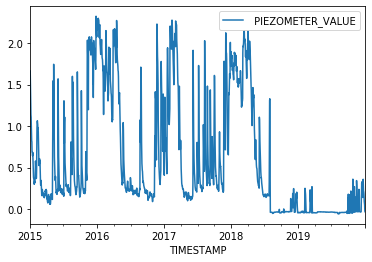

In [33]:
dw.plot()

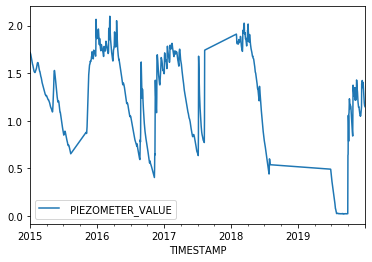

In [34]:
df.plot()

# Plotting the all features in various time stamps

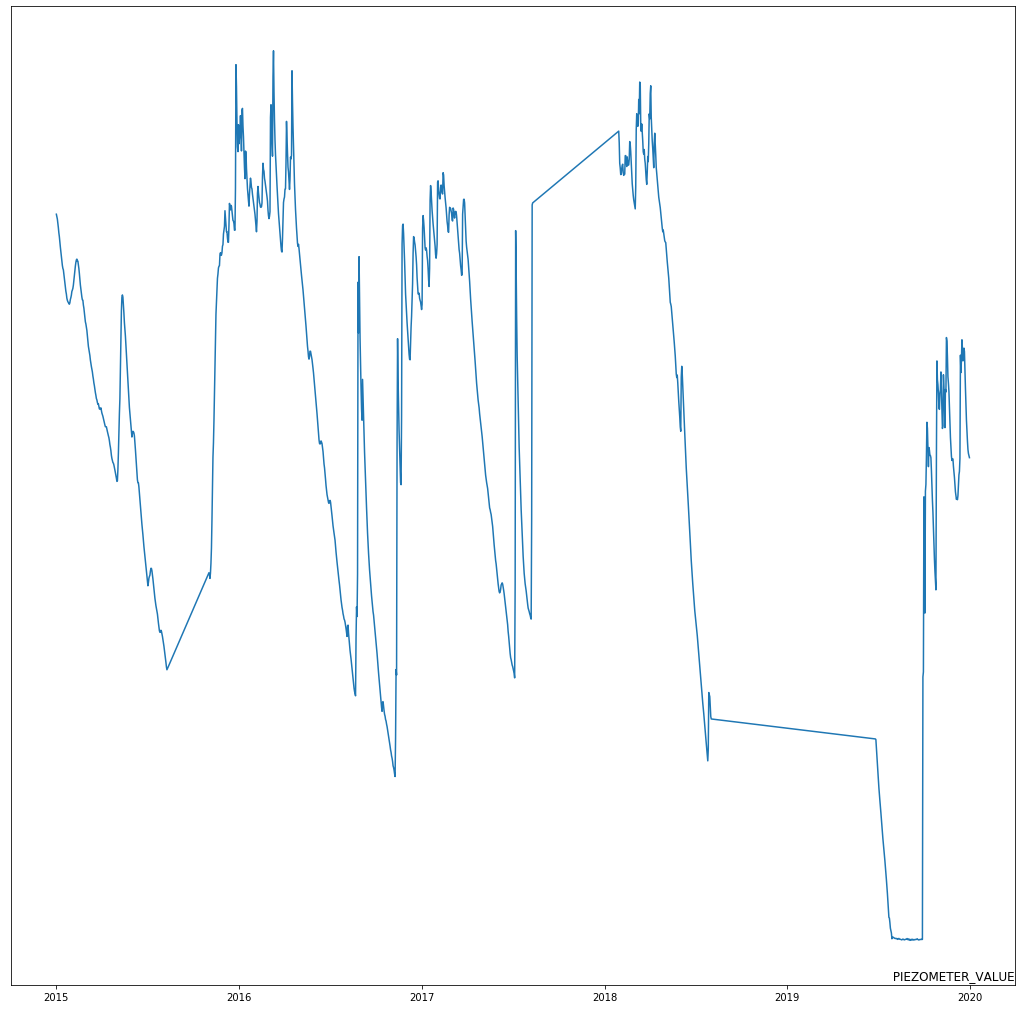

In [35]:
fig, ax = plt.subplots(figsize=(18,18))

for i in range(len(df.columns)):
    plt.subplot(len(df.columns), 1, i+1)
    name = df.columns[i]
    plt.plot(df[name])
    plt.title(name, y=0, loc = 'right')
    plt.yticks([])
plt.show()
fig.tight_layout()

# Problem Framing:


In [44]:
dtrain = df
dtrain.head(5)

,PIEZOMETER_VALUE
TIMESTAMP,
2015-01-01,1.715942
2015-01-02,1.709665
2015-01-03,1.704687
2015-01-04,1.695610
2015-01-05,1.684642


In [45]:
dtrain.shape

(1826, 1)

In [46]:
dtest = dw
dtest.head(5)

,PIEZOMETER_VALUE
TIMESTAMP,
2015-01-01,1.664029
2015-01-02,1.525135
2015-01-03,1.341090
2015-01-04,1.203785
2015-01-05,1.136883


In [210]:
dtest.shape

(2703, 9)

# Preparing Training Data 

[0.]
[0.]


In [47]:
from statsmodels.tsa.stattools import adfuller
for i in dtrain.columns:
    print(i)
    adfuller_test = adfuller(dtrain[i], autolag= "AIC")
    print("ADF test statistic: {}".format(adfuller_test[0]))
    print("p-value: {}".format(adfuller_test[1]))
    

 PIEZOMETER_VALUE
ADF test statistic: -2.4555694492308207
p-value: 0.12666229008196073


In [49]:
reframed=dtrain

In [50]:
reframed.columns

Index([' PIEZOMETER_VALUE'], dtype='object')

In [185]:
dtrain

,2.2,1.9,1.6,1.3,1,0.7,0.4,0.1
TIMESTAMP,,,,,,,,
2013-05-01,0.053260,0.079109,0.048162,0.012632,-0.018704,-0.008912,-0.046434,-0.122346
2013-05-02,0.044994,0.083609,0.084752,0.030311,0.004640,0.043121,-0.060192,-0.150943
2013-05-03,0.042431,0.036042,0.022375,-0.040006,-0.078588,0.066270,-0.162553,-0.380712
2013-05-04,0.030090,0.039781,0.029902,-0.003262,-0.022955,0.125308,-0.115533,-0.468291
2013-05-05,0.031307,0.033094,0.044868,-0.051199,-0.069161,0.027715,-0.224171,-0.493808
...,...,...,...,...,...,...,...,...
2020-10-19,-30.513591,30.309358,252.929597,345.637545,388.855498,487.017204,548.161814,574.545181
2020-10-20,-30.516172,30.273481,252.932173,345.649299,388.814370,486.968027,548.074834,574.443465
2020-10-21,-30.531199,30.215903,252.919400,345.604737,388.758522,486.906361,547.962648,574.286817


In [85]:
#from statsmodels.tsa.stattools import adfuller
#for i in reframed.columns:
   # print(i)
   # adfuller_test = adfuller(reframed[i], autolag= "AIC")
   # print("ADF test statistic: {}".format(adfuller_test[0]))
   # print("p-value: {}".format(adfuller_test[1]))
    

IndentationError: unexpected indent (<ipython-input-85-4f352e115b96>, line 7)

In [216]:
values = reframed.values
train = values[:300, :]
test = values[300:, :]

In [217]:
values.shape

(2732, 16)

In [218]:
# split into input and outputs to predict 8 sensors data
train_X, train_y = train[:, :-8], train[:, -8]
test_X, test_y = test[:, :-8], test[:, -8]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(300, 1, 8) (300,) (2432, 1, 8) (2432,)


In [219]:
test_X.shape

(2432, 1, 8)

In [226]:
train_y

array([ 0.04499375,  0.04243125,  0.03009   ,  0.03130667,  0.03128583,
        0.04707042,  0.06154625,  0.0610925 ,  0.07151625,  0.06348875,
        0.04532167,  0.05676708,  0.05817917,  0.09403583,  0.07478458,
        0.09467917,  0.08556417,  0.11193417,  0.12748417,  0.12196125,
        0.09582417,  0.09930167,  0.10116125,  0.09443042,  0.09070042,
        0.07462583,  0.073945  ,  0.07950417,  0.09086667,  0.09396143,
        0.09665812,  0.09663369,  0.09660927,  0.09658484,  0.09656042,
        0.09653599,  0.09651156,  0.09648714,  0.09646271,  0.09643829,
        0.09641386,  0.09638943,  0.09636501,  0.09634058,  0.09631616,
        0.09629173,  0.09626731,  0.09624288,  0.09621845,  0.09619403,
        0.0961696 ,  0.09614518,  0.09612075,  0.09609633,  0.0960719 ,
        0.09604747,  0.09602305,  0.09599862,  0.0959742 ,  0.09594977,
        0.09592534,  0.09590092,  0.09587649,  0.09585207,  0.09582764,
        0.09580322,  0.09577879,  0.09575436,  0.09572994,  0.09

# Building Sequential LSTM using keras

In [220]:
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
rgn = Sequential()
rgn.add(LSTM(units = 200, activation = 'relu', input_shape=(train_X.shape[1], train_X.shape[2])))
rgn.add(Dense(1))
rgn.compile(loss='mae', optimizer='adam')

In [221]:
#train the model

model=rgn.fit(train_X, train_y, epochs = 100,batch_size=72, validation_data=(test_X, test_y))

Epoch 1/100
5/5 [==============================] - 2s 125ms/step - loss: 0.7435 - val_loss: 18.3101
Epoch 2/100
5/5 [==============================] - 0s 41ms/step - loss: 0.5666 - val_loss: 15.4838
Epoch 3/100
5/5 [==============================] - 0s 37ms/step - loss: 0.4268 - val_loss: 3.7300
Epoch 4/100
5/5 [==============================] - 0s 37ms/step - loss: 0.3999 - val_loss: 8.5033
Epoch 5/100
5/5 [==============================] - 0s 37ms/step - loss: 0.3747 - val_loss: 11.3511
Epoch 6/100
5/5 [==============================] - 0s 37ms/step - loss: 0.3163 - val_loss: 4.0546
Epoch 7/100
5/5 [==============================] - 0s 37ms/step - loss: 0.2606 - val_loss: 5.4077
Epoch 8/100
5/5 [==============================] - 0s 35ms/step - loss: 0.2273 - val_loss: 3.2350
Epoch 9/100
5/5 [==============================] - 0s 33ms/step - loss: 0.2163 - val_loss: 3.7798
Epoch 10/100
5/5 [==============================] - 0s 33ms/step - loss: 0.2264 - val_loss: 4.0680
Epoch 11/100
5/

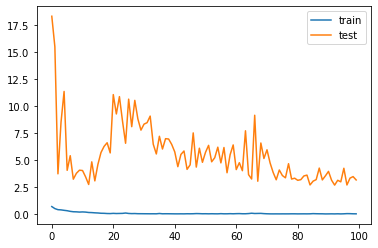

In [222]:
# plot history
from matplotlib import pyplot
pyplot.plot(model.history['loss'], label='train')
pyplot.plot(model.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()


In [223]:
# Evaluating the model 
yhat = rgn.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
#inv_yhat = np.scaler.inverse_transform(inv_yhat)   remove the comment when scaling has been applied
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
#inv_y = scaler.inverse_transform(inv_y)  remove the comment when scaling has been applied
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 4.301


In [55]:
### Prediction on the test data 

In [224]:
reframed_test=series_to_supervised(dtest)
test = reframed_test.values
test_X, test_y = test[:, :-8], test[:, -8]
test_X=test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
y_pred = rgn.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
inv_yhat = np.concatenate((y_pred, test_X[:, 1:]), axis=1)
inv_yhat = inv_yhat[:,0]
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = inv_y[:,0]
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 6.745


In [236]:
actual_val.shape

(2732,)

In [234]:
inv_yhat.shape

(2702,)

In [232]:
timestamp=reframed.reset_index()['TIMESTAMP'][:]
actual_val=reframed.reset_index()['var1(t)'][:]
Predicted_values=pd.DataFrame({'timestamp':timestamp,'predicted_value':inv_yhat,'actual_value':actual_val})


ValueError: array length 2702 does not match index length 2732

In [228]:
plt.plot(Predicted_values.timestamp,Predicted_values.predicted_value,lab)
plt.plot(Predicted_values.timestamp,Predicted_values.actual_value)


NameError: name 'Predicted_values' is not defined